In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


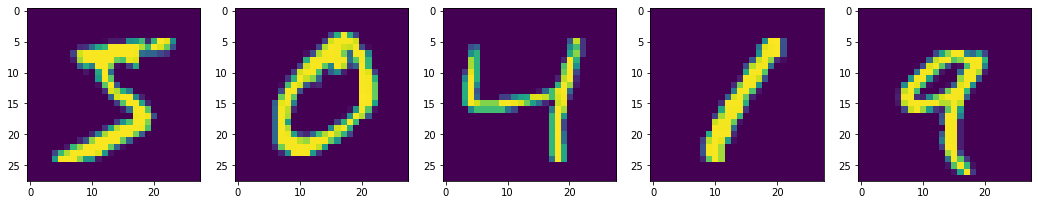

[5 0 4 1 9]


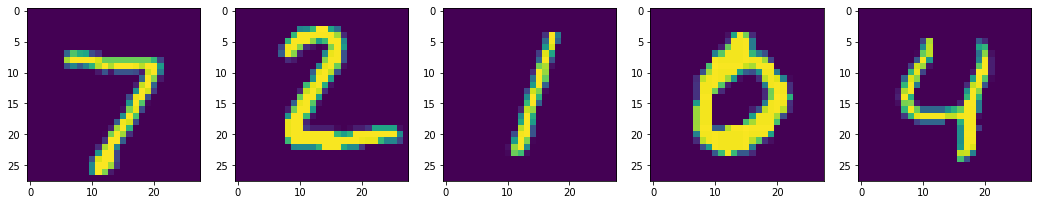

[7 2 1 0 4]


In [3]:
data = tf.keras.datasets.mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data

def inspect(images, labels=None):
    plt.figure(figsize=(18, 4))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
    plt.show()
    if labels is not None:
        print(labels[:5])

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
inspect(train_images, train_labels)
inspect(test_images, test_labels)

In [4]:
print(train_images[0].max(), train_images[0].min())

255 0


1.0 0.0


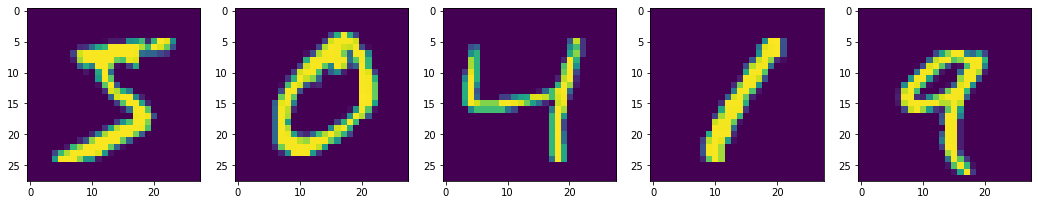

[5 0 4 1 9]


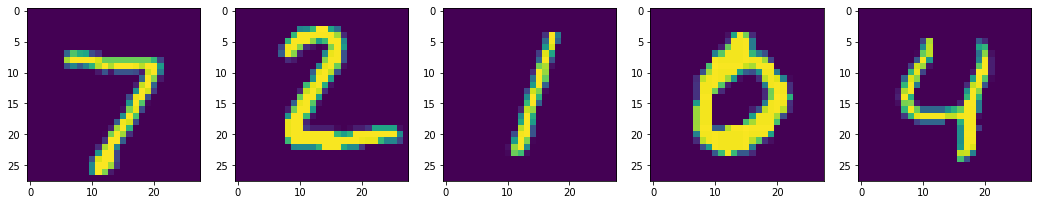

[7 2 1 0 4]


In [5]:
data = tf.keras.datasets.mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data
train_images = train_images / np.float32(255)
test_images = test_images / np.float32(255)
print(train_images[0].max(), train_images[0].min())
inspect(train_images, train_labels)
inspect(test_images, test_labels)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4683 - accuracy: 0.8784 - val_loss: 0.3069 - val_accuracy: 0.9143
Epoch 2/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3043 - accuracy: 0.9144 - val_loss: 0.2800 - val_accuracy: 0.9220
Epoch 3/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2835 - accuracy: 0.9204 - val_loss: 0.2765 - val_accuracy: 0.9227
Epoch 4/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2731 - accuracy: 0.9236 - val_loss: 0.2698 - val_accuracy: 0.9261
Epoch 5/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2666 - accuracy: 0.9259 - val_loss: 0.2661 - val_accuracy: 0.9276
Epoch 6/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2622 - accuracy: 0.9266 - val_loss: 0.2638 - val_accuracy: 0.9268
Epoch 7/10
60000/60000 [==============================] 

In [8]:
model.evaluate(train_images, train_labels)

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.24647182873884838, 0.9309667]

In [9]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
print(test_labels[:10], predictions[:10])

[7 2 1 0 4 1 4 9 5 9] [7 2 1 0 4 1 4 9 6 9]


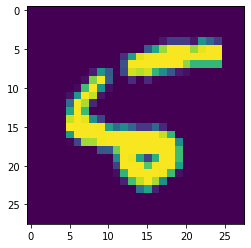

5 6


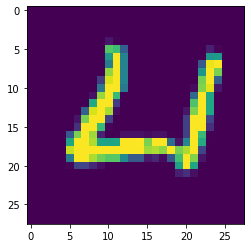

4 6


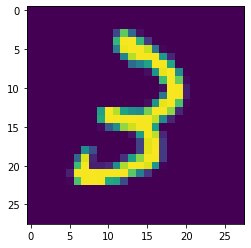

3 2


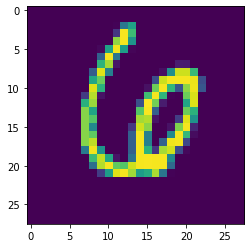

6 2


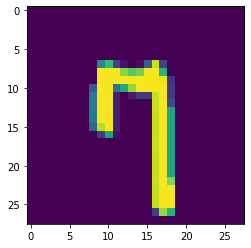

7 9


In [10]:
wrong = test_labels != predictions
false_images = test_images[wrong]
false_labels = test_labels[wrong]
false_predictions = predictions[wrong]

for i in range(5):
    plt.imshow(false_images[i])
    plt.show()
    print(false_labels[i], false_predictions[i])

7


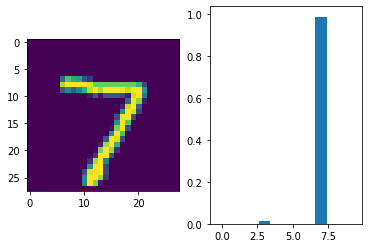

2


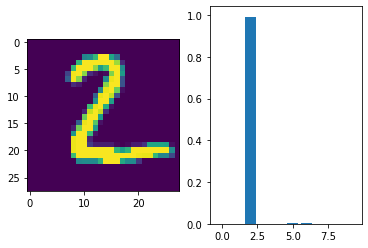

1


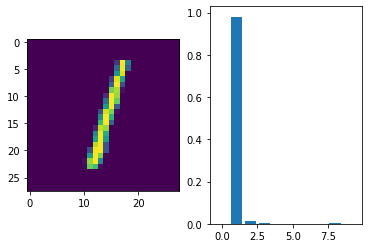

0


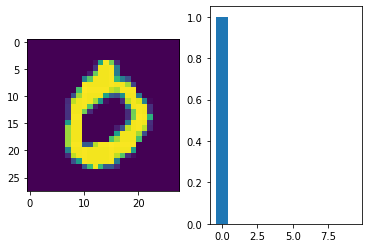

4


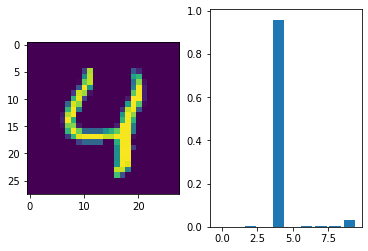

1


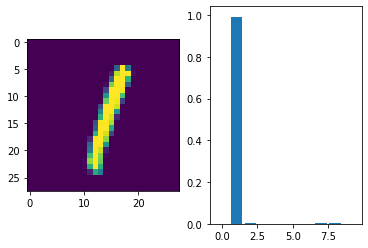

4


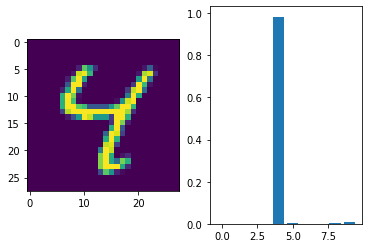

9


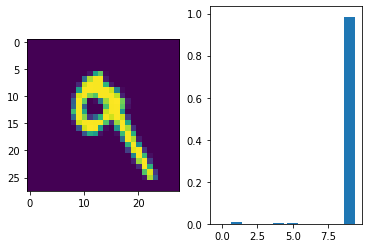

5


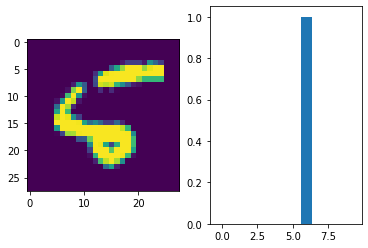

9


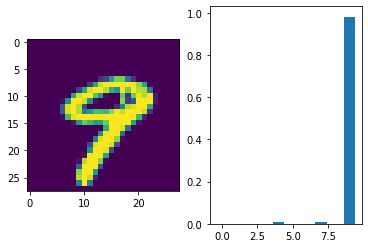

In [11]:
def play(image, label):
    print(label)
    predictions = model.predict(tf.reshape(image, (1, 28, 28)))
    predictions = tf.reshape(predictions, (10, ))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(10), predictions)
    plt.show()
for image, label in zip(test_images[:10], test_labels[:10]):
    play(image, label)

In [12]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(test_images, test_labels))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2574 - accuracy: 0.9256 - val_loss: 0.1302 - val_accuracy: 0.9596
Epoch 2/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1115 - accuracy: 0.9669 - val_loss: 0.0952 - val_accuracy: 0.9707
Epoch 3/10
60000/60000 [======